# Vehicle Clustering Analysis

## Problem Statement
In clustering analysis, visualizing how data points group together is essential for interpreting cluster behavior and understanding dataset patterns. For vehicle datasets, attributes such as car width, length, engine size, or curb weight play a key role in determining how similar models cluster based on physical dimensions or performance characteristics.

## Objectives
1. **Build an Agglomerative Clustering Model**
   - Use `AgglomerativeClustering` with `n_clusters = 2` and `linkage = 'ward'`.
   - Apply Euclidean distance.
2. **Visualize Clusters Using a 2D Scatter Plot**
   - x-axis: Width, y-axis: Length.
   - Color by cluster (viridis colormap).
3. **Analyze and Interpret**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Load the dataset
file_path = 'ML470_S7_Vehicle_Data_Practice.csv'
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639


In [3]:
# Data Preprocessing
# Select relevant features: Width and Length
# Drop rows with missing values in these columns to ensure clustering works
features = ['Width', 'Length']
df_clean = df.dropna(subset=features).copy()

X = df_clean[features]

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")

Original dataset shape: (157, 15)
Cleaned dataset shape: (156, 15)


In [4]:
# Build Agglomerative Clustering Model
# n_clusters=2, linkage='ward' (uses Euclidean distance by default)
agg_model = AgglomerativeClustering(n_clusters=2, linkage='ward')

# Fit model and predict clusters
df_clean['Cluster'] = agg_model.fit_predict(X)

# Check the distribution of clusters
df_clean['Cluster'].value_counts()

Cluster
0    110
1     46
Name: count, dtype: int64

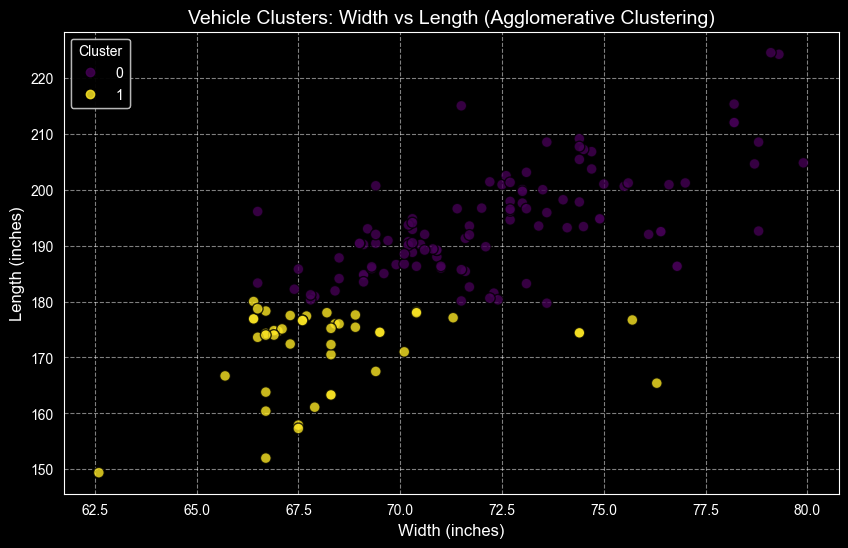

In [5]:
# Visualize Clusters
plt.figure(figsize=(10, 6))

# Scatter plot
scatter = plt.scatter(
    df_clean['Width'], 
    df_clean['Length'], 
    c=df_clean['Cluster'], 
    cmap='viridis', 
    edgecolor='k', 
    s=60, 
    alpha=0.8
)

# Labels and Title
plt.xlabel('Width (inches)', fontsize=12)
plt.ylabel('Length (inches)', fontsize=12)
plt.title('Vehicle Clusters: Width vs Length (Agglomerative Clustering)', fontsize=14)

# Legend
legend = plt.legend(*scatter.legend_elements(), title="Cluster")
plt.gca().add_artist(legend)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Interpretation

**Cluster Groups:**
The 2D scatter plot reveals how vehicles are grouped based on their physical dimensions.
- One cluster generally corresponds to **smaller vehicles** (lower width and length).
- The other cluster corresponds to **larger vehicles** (higher width and length).

**Separation:**
The separation is relatively clear along the diagonal, suggesting that Width and Length are correlated and together provide a strong signal for vehicle size categorization. Ward linkage has effectively created compact groups based on these geometric features.